In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
def categoricalToNumerical(dataset):

    dataset['flat_type'].replace('-', ' ', inplace = True, regex=True)
    dataset['month'] = ((pd.to_datetime("today") - pd.to_datetime(dataset['month']))/np.timedelta64(1, 'M')).astype(int)
    dataset['lease_commence_date'] = pd.to_datetime("today").year - dataset['lease_commence_date']
    
    tenc=ce.TargetEncoder()                     
    planning_area_target = tenc.fit_transform(dataset['planning_area'],dataset['resale_price'])
    dataset = planning_area_target.join(dataset.drop('planning_area',axis = 1))
    
    region_target = tenc.fit_transform(dataset['region'],dataset['resale_price'])
    dataset = region_target.join(dataset.drop('region',axis = 1))
    
    town_target = tenc.fit_transform(dataset['town'],dataset['resale_price'])
    dataset = town_target.join(dataset.drop('town',axis = 1))
                                       
    subzone_target = tenc.fit_transform(dataset['subzone'],dataset['resale_price'])
    dataset = subzone_target.join(dataset.drop('subzone',axis = 1))
    
    street_name_target = tenc.fit_transform(dataset['street_name'],dataset['resale_price'])
    dataset = street_name_target.join(dataset.drop('street_name',axis = 1))
    
    storey_range_target = tenc.fit_transform(dataset['storey_range'],dataset['resale_price'])
    dataset = storey_range_target.join(dataset.drop('storey_range',axis = 1))
    
    flat_model_target = tenc.fit_transform(dataset['flat_model'],dataset['resale_price'])
    dataset = flat_model_target.join(dataset.drop('flat_model',axis = 1))
    
    flat_type_target = tenc.fit_transform(dataset['flat_type'],dataset['resale_price'])
    dataset = flat_type_target.join(dataset.drop('flat_type',axis = 1))

    block_target = tenc.fit_transform(dataset['block'],dataset['resale_price'])
    dataset = block_target.join(dataset.drop('block',axis = 1))
    
    eco_category_target = tenc.fit_transform(dataset['eco_category'],dataset['resale_price'])
    dataset = eco_category_target.join(dataset.drop('eco_category',axis = 1))
    
    return dataset

train = categoricalToNumerical(train)

In [5]:
train.head()

,eco_category,block,flat_type,flat_model,storey_range,street_name,subzone,town,region,planning_area,month,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,resale_price
0,301819.588443,251830.098165,297586.688369,296567.768441,277884.021822,335096.017105,341040.552513,355607.204429,310452.339983,356939.169153,260,118.0,34,1.369008,103.958697,0.0,209700.0
1,301819.588443,395438.935183,381620.322780,316907.730293,299298.260782,389482.209813,377687.332519,396370.197932,316400.744309,396370.197932,102,110.0,20,1.399007,103.906991,0.0,402300.0
2,301819.588443,362593.256834,381620.322780,371640.199919,277884.021822,377199.711906,381799.501001,363989.419778,316400.744309,363989.419778,31,112.0,19,1.388348,103.873815,0.0,351000.0
3,301819.588443,269228.996869,209623.240506,228834.110584,290671.595267,266043.973770,283592.498038,288492.646723,285535.692084,288492.646723,270,67.0,43,1.318493,103.766702,0.0,151200.0
4,301819.588443,301060.642762,209623.240506,296567.768441,290671.595267,279405.665439,259677.269347,267844.134266,285535.692084,267844.134266,123,73.0,38,1.348149,103.742658,0.0,318600.0


In [6]:
train_loc = train[['region', 'town','planning_area','subzone','street_name','resale_price']]

In [7]:
train_all = train[['region', 'town','planning_area','subzone',
                   'street_name','block','flat_model','storey_range','flat_type',
                   'month','floor_area_sqm','lease_commence_date',
                   'latitude','longitude', 'eco_category', 'elevation',
                   'resale_price']]

In [8]:
train_loc.corr()

,region,town,planning_area,subzone,street_name,resale_price
region,1.000000,0.554999,0.553848,0.356408,0.284977,0.158748
town,0.554999,1.000000,0.983094,0.641208,0.515306,0.285563
planning_area,0.553848,0.983094,1.000000,0.643517,0.518091,0.286629
subzone,0.356408,0.641208,0.643517,1.000000,0.766017,0.445380
street_name,0.284977,0.515306,0.518091,0.766017,1.000000,0.556127
resale_price,0.158748,0.285563,0.286629,0.445380,0.556127,1.000000


In [9]:
train_all.corr()

,region,town,planning_area,subzone,street_name,block,flat_model,storey_range,flat_type,month,floor_area_sqm,lease_commence_date,latitude,longitude,eco_category,elevation,resale_price
region,1.000000,0.554999,0.553848,0.356408,0.284977,0.105048,-0.012570,0.115941,-0.155125,-0.029634,-0.182936,0.263276,-0.666794,0.574331,NaN,NaN,0.158748
town,0.554999,1.000000,0.983094,0.641208,0.515306,0.230502,0.220853,0.128561,0.151391,-0.113112,0.114326,-0.231782,-0.222462,0.351468,NaN,NaN,0.285563
planning_area,0.553848,0.983094,1.000000,0.643517,0.518091,0.239930,0.227870,0.138400,0.148832,-0.112999,0.110611,-0.232669,-0.228222,0.350045,NaN,NaN,0.286629
subzone,0.356408,0.641208,0.643517,1.000000,0.766017,0.374832,0.294097,0.212310,0.277581,-0.136416,0.248947,-0.445389,-0.151437,0.223443,NaN,NaN,0.445380
street_name,0.284977,0.515306,0.518091,0.766017,1.000000,0.502215,0.401927,0.272185,0.366448,-0.171169,0.335334,-0.539126,-0.117476,0.178757,NaN,NaN,0.556127
block,0.105048,0.230502,0.239930,0.374832,0.502215,1.000000,0.362787,0.256071,0.304319,-0.197720,0.239547,-0.467355,0.003612,0.058417,NaN,NaN,0.443519
flat_model,-0.012570,0.220853,0.227870,0.294097,0.401927,0.362787,1.000000,0.141361,0.614043,-0.113730,0.611916,-0.378643,0.089609,0.009141,NaN,NaN,0.503881
storey_range,0.115941,0.128561,0.138400,0.212310,0.272185,0.256071,0.141361,1.000000,0.100032,-0.116270,0.057266,-0.194709,-0.118895,-0.039413,NaN,NaN,0.326001
flat_type,-0.155125,0.151391,0.148832,0.277581,0.366448,0.304319,0.614043,0.100032,1.000000,-0.053806,0.949901,-0.478643,0.243500,0.001529,NaN,NaN,0.597318
month,-0.029634,-0.113112,-0.112999,-0.136416,-0.171169,-0.197720,-0.113730,-0.116270,-0.053806,1.000000,-0.010105,0.228743,-0.033380,-0.016043,NaN,NaN,-0.579103


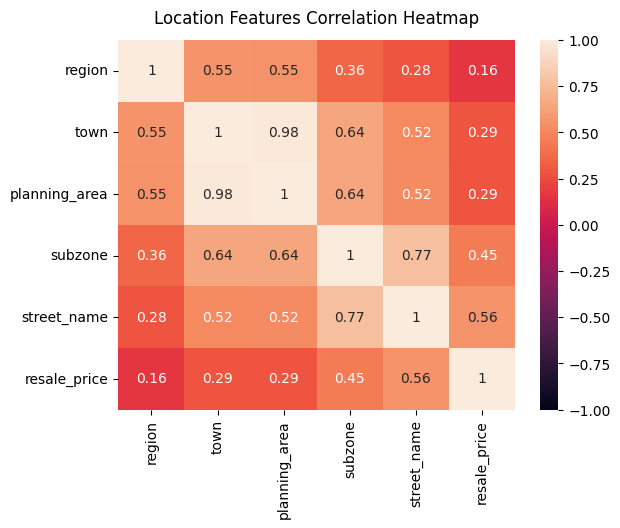

In [11]:
heatmap_loc = sns.heatmap(train_loc.corr(), vmin=-1, vmax=1, annot=True)
heatmap_loc.set_title('Location Features Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

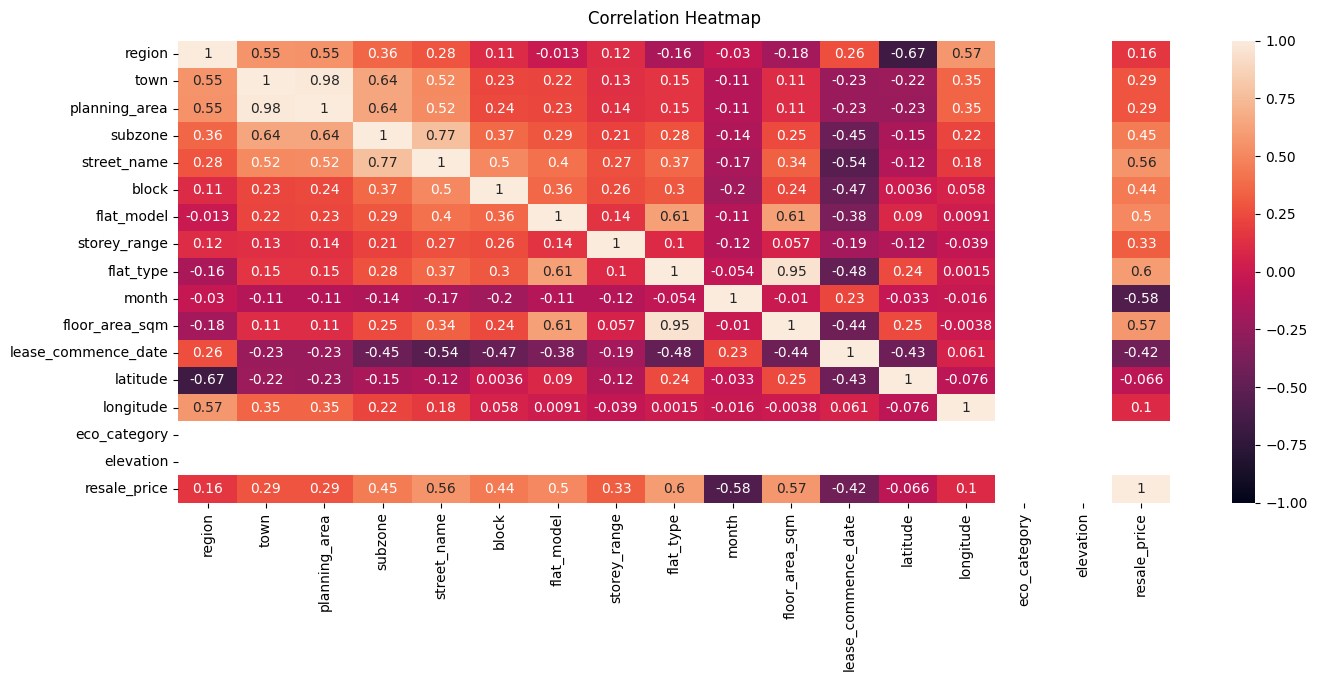

In [10]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_all.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);